In [483]:
#Import the needed libraries 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import numpy as np
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm
from scipy import stats

In [484]:
#read the input file
df_train = pd.read_csv('train.csv')
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train['DataType']= 'Train'
df_test = pd.read_csv('test.csv')
df_test['DataType']= 'Test'
df = df_train.append(df_test,sort=False) 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DataType
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,Train


In [485]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2917.0,1460.376071,842.892456,1.0,731.0,1461.0,2190.0,2919.0
MSSubClass,2917.0,57.135756,42.532140,20.0,20.0,50.0,70.0,190.0
LotFrontage,2431.0,69.180584,22.791719,21.0,59.0,68.0,80.0,313.0
LotArea,2917.0,10139.439150,7807.036512,1300.0,7476.0,9452.0,11556.0,215245.0
OverallQual,2917.0,6.086390,1.406704,1.0,5.0,6.0,7.0,10.0
OverallCond,2917.0,5.564964,1.113414,1.0,5.0,5.0,6.0,9.0
YearBuilt,2917.0,1971.287967,30.286991,1872.0,1953.0,1973.0,2001.0,2010.0
YearRemodAdd,2917.0,1984.248200,20.892257,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2894.0,101.733587,178.510291,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2916.0,439.015432,444.182329,0.0,0.0,368.0,733.0,4010.0


In [486]:
df.isna().sum(axis = 0).sort_values(ascending=False).head(20)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64

In [487]:
df = df.loc[:, df.isnull().sum() < 0.6*df.shape[0]]

In [488]:
df = df.fillna(df.groupby('Neighborhood').transform('median'))

In [489]:
df.isna().sum(axis = 0).sort_values(ascending=False).head(20)

FireplaceQu     1420
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
KitchenQual        1
Electrical         1
SaleType           1
Exterior2nd        1
Exterior1st        1
RoofStyle          0
dtype: int64

In [490]:
df.loc[df['DataType'] == "Test", ['SalePrice']] = np.NaN
df.isna().sum(axis = 0).sort_values(ascending=False).head(20)

SalePrice       1459
FireplaceQu     1420
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Electrical         1
KitchenQual        1
Exterior2nd        1
SaleType           1
Exterior1st        1
dtype: int64

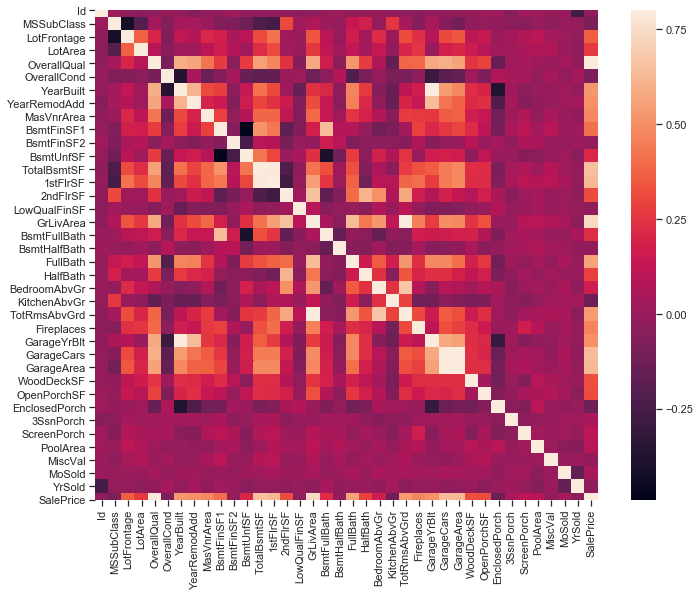

In [491]:
#Explore correlation between variables
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

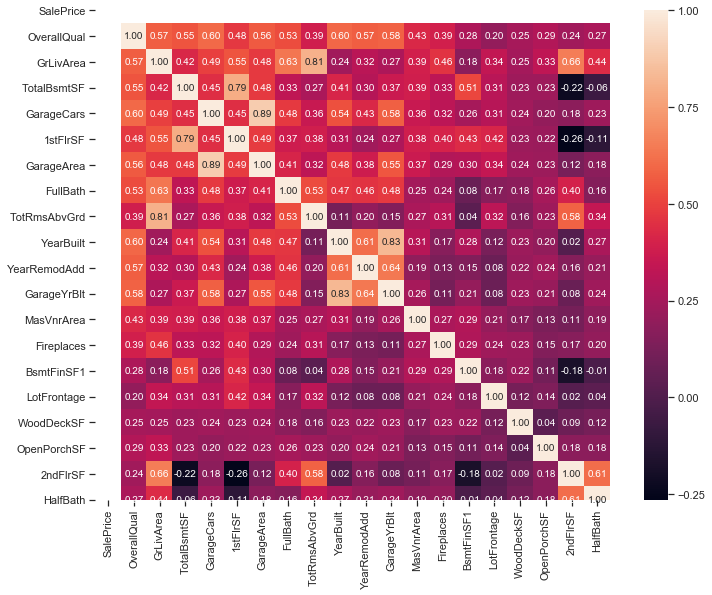

In [492]:
#saleprice correlation matrix for top 20 correlated variables

k = 20 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [493]:
#Focus only on Features with high correlation
df = df[['OverallQual','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','Fireplaces','LotFrontage','2ndFlrSF','SalePrice','DataType']]

c:\users\user-5\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\user-5\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


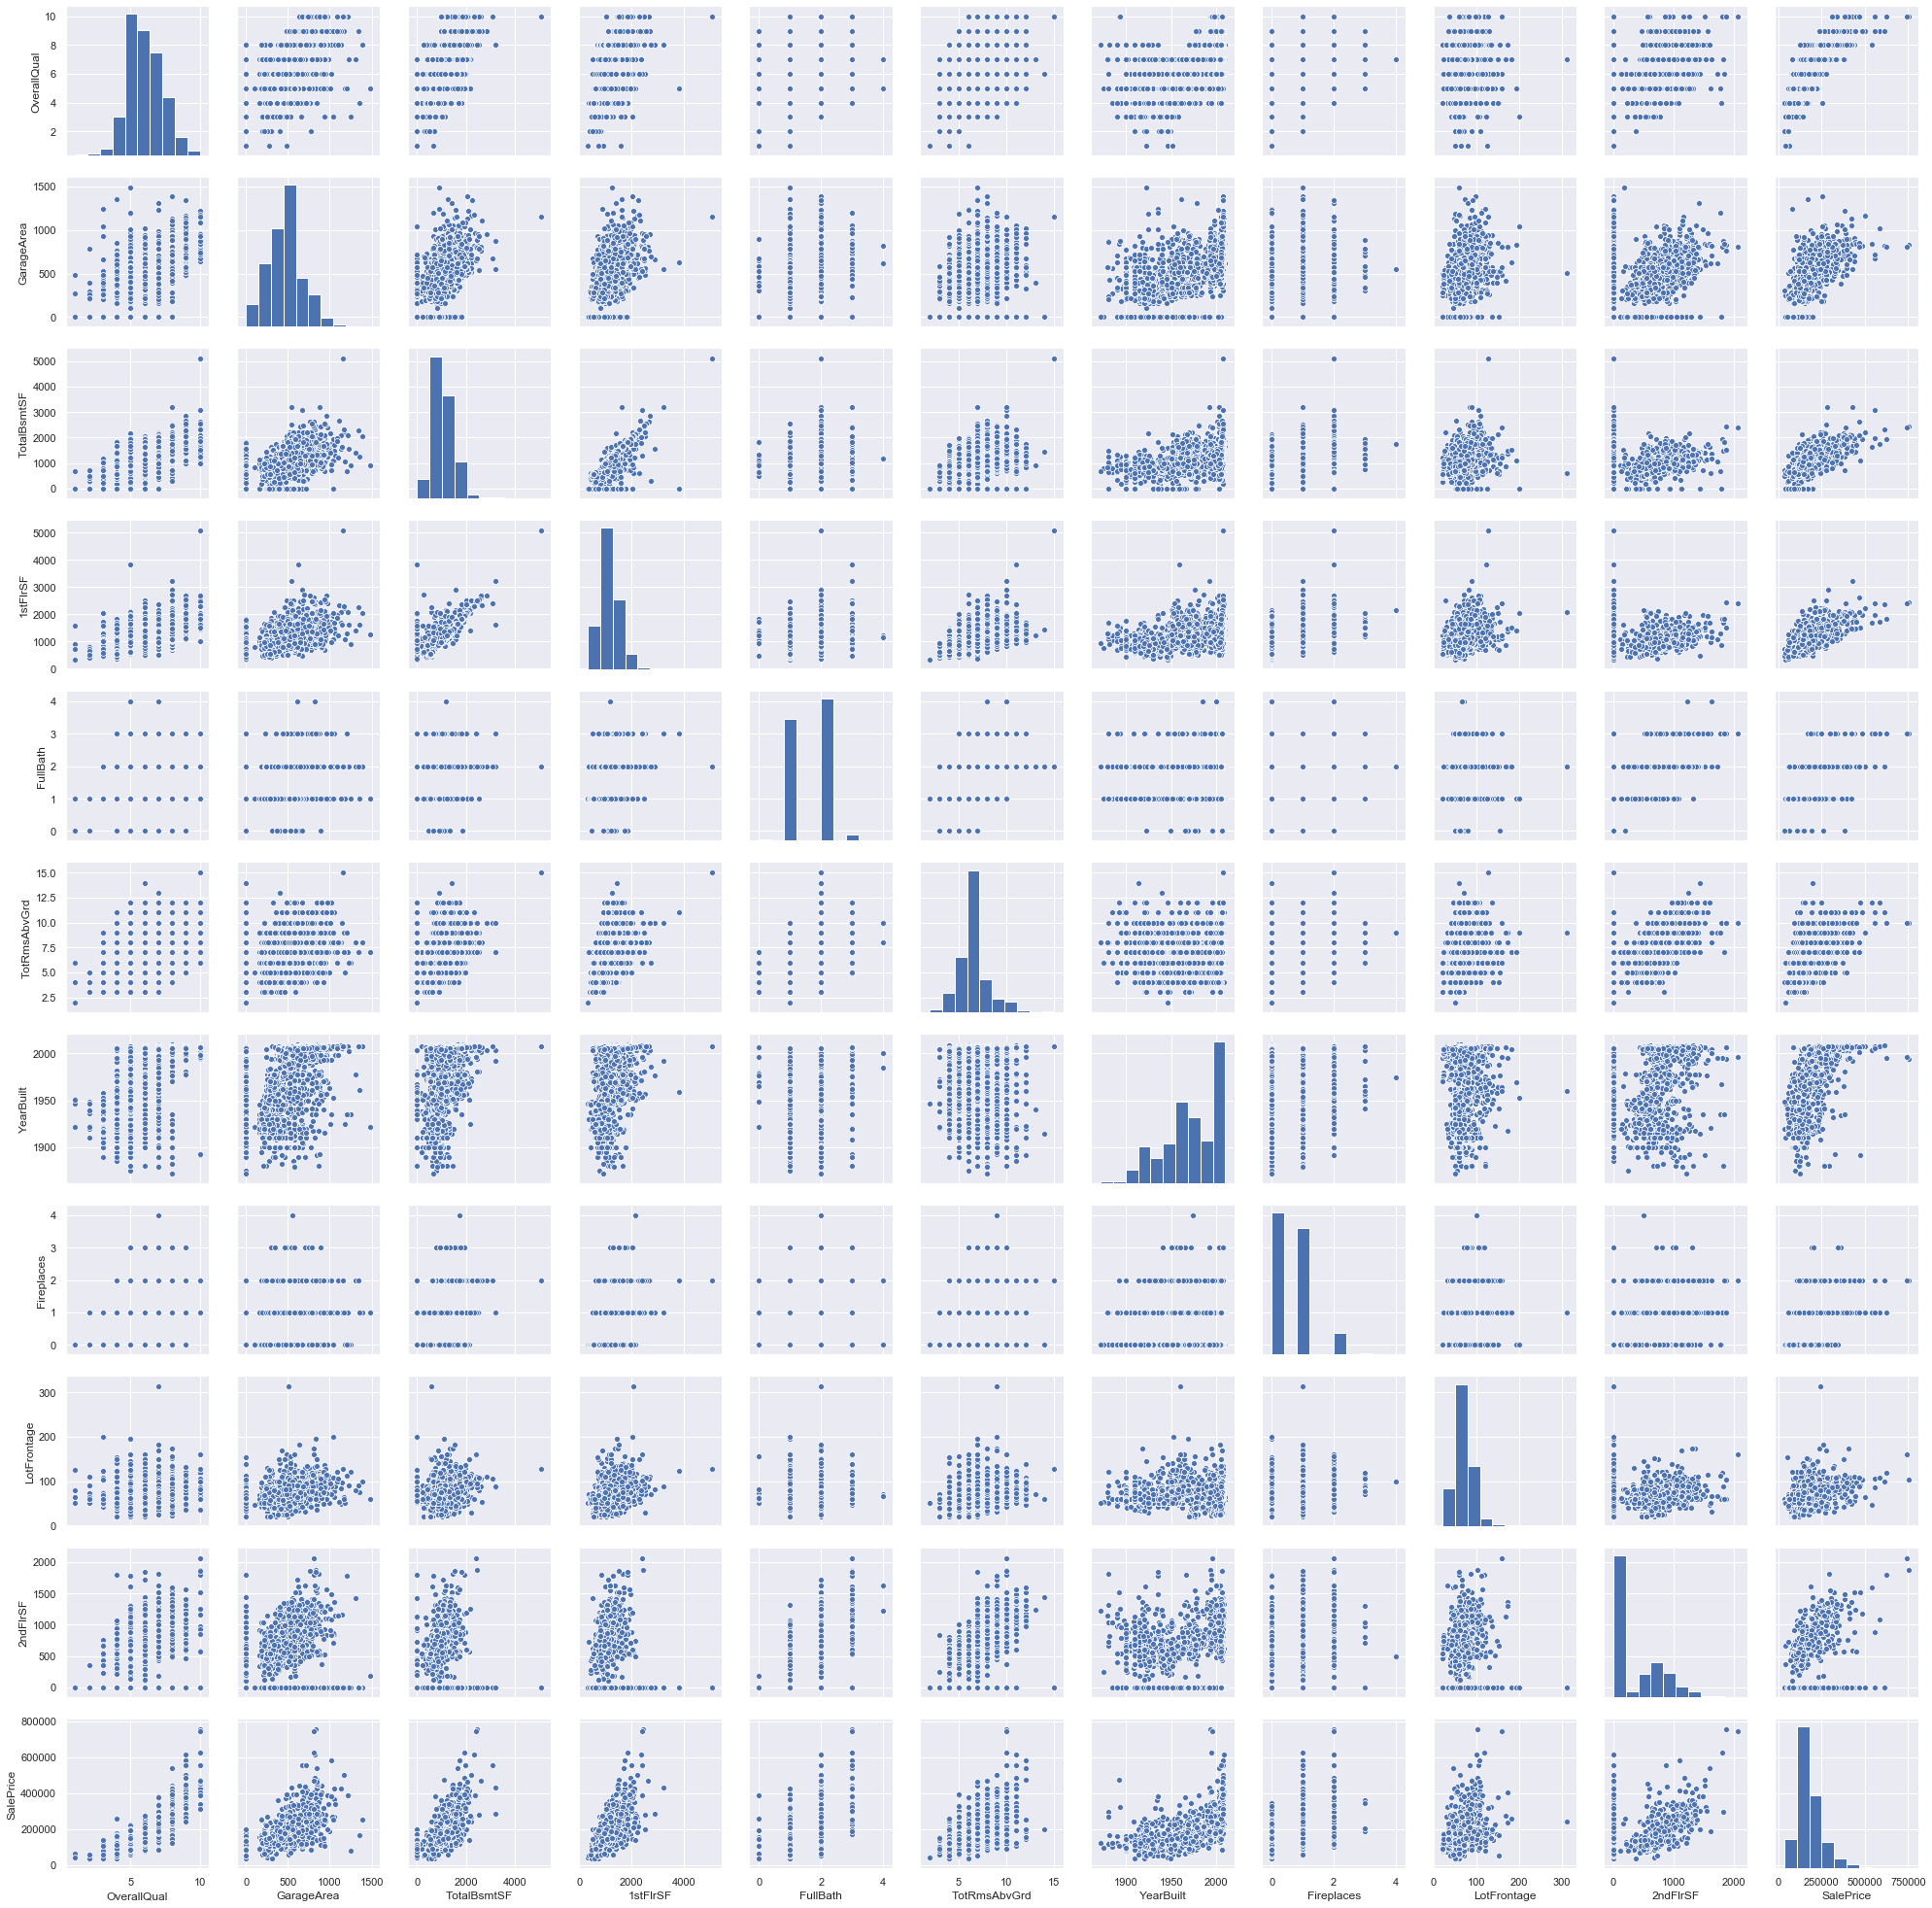

In [494]:
#scatterplot
sns.set()
sns.pairplot(df, height = 2.5)
plt.show();

In [495]:
#Regularize Skewed Data using Percentile Linearization 
size = len(df.OverallQual)-1
df.OverallQual = df.OverallQual.rank(method='min').apply(lambda x: (x-1)/size)

size = len(df.GarageArea)-1
df.GarageArea = df.GarageArea.rank(method='min').apply(lambda x: (x-1)/size)

size = len(df.TotalBsmtSF)-1
df.TotalBsmtSF = df.TotalBsmtSF.rank(method='min').apply(lambda x: (x-1)/size)

size = len(df['1stFlrSF'])-1
df['1stFlrSF'] = df['1stFlrSF'].rank(method='min').apply(lambda x: (x-1)/size)

size = len(df.FullBath)-1
df.FullBath = df.FullBath.rank(method='min').apply(lambda x: (x-1)/size)

size = len(df.TotRmsAbvGrd)-1
df.TotRmsAbvGrd = df.TotRmsAbvGrd.rank(method='min').apply(lambda x: (x-1)/size)

size = len(df.YearBuilt)-1
df.YearBuilt = df.YearBuilt.rank(method='min').apply(lambda x: (x-1)/size)

size = len(df.Fireplaces)-1
df.Fireplaces = df.Fireplaces.rank(method='min').apply(lambda x: (x-1)/size)

size = len(df['2ndFlrSF'])-1
df['2ndFlrSF'] = df['2ndFlrSF'].rank(method='min').apply(lambda x: (x-1)/size)



In [496]:
df_test = df[df['SalePrice'].isnull()]
df_test.describe()

,OverallQual,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Fireplaces,LotFrontage,2ndFlrSF,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,0.0
mean,0.394882,0.493692,0.496410,0.496624,0.261964,0.388880,0.492559,0.276737,68.906443,0.329657,NaN
std,0.301537,0.292990,0.294381,0.291328,0.248276,0.290612,0.286170,0.298697,20.936157,0.392269,NaN
min,0.000000,0.000000,0.000000,0.000686,0.000000,0.000343,0.000686,0.000000,21.000000,0.000000,NaN
25%,0.097051,0.246399,0.242798,0.245713,0.004115,0.076132,0.242112,0.000000,60.000000,0.000000,NaN
50%,0.379973,0.500000,0.496228,0.495199,0.453018,0.276063,0.497257,0.000000,70.000000,0.000000,NaN
75%,0.630658,0.722565,0.751372,0.747599,0.453018,0.565501,0.748971,0.486968,80.000000,0.727366,NaN
max,0.990398,1.000000,1.000000,1.000000,0.998971,1.000000,0.999314,1.000000,200.000000,0.999314,NaN


In [497]:
df_train = df[df['SalePrice'].notnull()]
df_train.describe()

,OverallQual,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Fireplaces,LotFrontage,2ndFlrSF,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,0.398890,0.496264,0.500626,0.501783,0.261602,0.416208,0.490631,0.292179,69.966049,0.343020,180932.919067
std,0.292914,0.290744,0.285522,0.287148,0.246050,0.302152,0.282734,0.299914,21.471167,0.401901,79495.055285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,34900.000000
25%,0.097051,0.256430,0.253687,0.254458,0.004115,0.076132,0.250343,0.000000,60.000000,0.000000,129925.000000
50%,0.379973,0.499657,0.503429,0.502401,0.453018,0.276063,0.490398,0.486968,70.000000,0.000000,163000.000000
75%,0.630658,0.722565,0.747342,0.752401,0.453018,0.565501,0.732510,0.486968,80.000000,0.764403,214000.000000
max,0.990398,0.999657,0.999657,0.999314,0.977366,0.999657,0.999314,0.996571,313.000000,1.000000,755000.000000


In [498]:
x = df_train[['OverallQual','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','Fireplaces','LotFrontage','2ndFlrSF']]
y = df_train['SalePrice']

x = pd.get_dummies(x)

In [499]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [500]:
# Create linear regression object

reg = linear_model.LinearRegression(normalize=False)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [501]:
y_pred = reg.predict(X_test)

Mean squared error: 2179006081.12
Variance score: 0.70


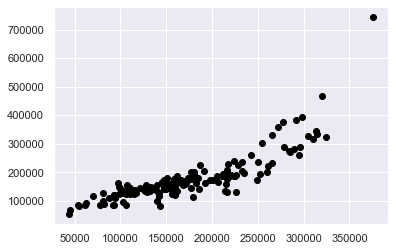

In [502]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
plt.scatter(y_pred, y_test,  color='black')

In [503]:
m_rf = RandomForestRegressor(n_estimators=160, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True, random_state=42)
m_rf.fit(X_train, y_train)
y_pred_RFR = m_rf.predict(X_test)

Mean squared error: 761034735.65
Variance score: 0.90


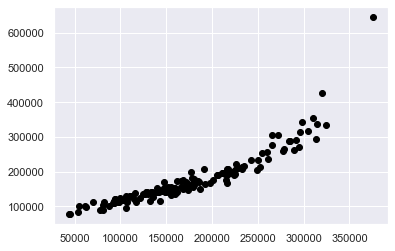

In [504]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_RFR))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_RFR))


# Plot outputs
plt.scatter(y_pred, y_pred_RFR,  color='black')

Mean squared error: 2139941744.98
Variance score: 0.71


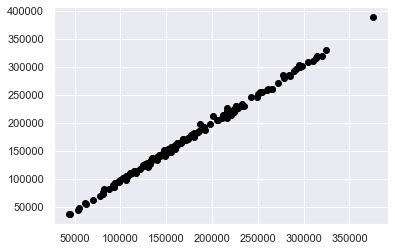

In [505]:
regr = ElasticNet(alpha=0.0005, l1_ratio=0.001, fit_intercept=False, normalize=False, precompute=True, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None)
regr.fit(X_train, y_train)  

y_pred_EN = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_EN))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_EN))


# Plot outputs
plt.scatter(y_pred, y_pred_EN,  color='black')

In [506]:
# predict the scores  on the Kaggle Test Dataset for submission

In [507]:
x_testset = df_test[['OverallQual','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','Fireplaces','LotFrontage','2ndFlrSF']]
x = pd.get_dummies(x_testset)

In [510]:
y_pred_dataset = m_rf.predict(x_testset)
np.set_printoptions(precision=3)
y_pred_dataset

array([136929.406, 151720.   , 168612.644, ..., 153548.75 , 110403.125,
       235853.013])

In [511]:
df_test['SalePrice'] = y_pred_dataset
header = ["Id", "SalePrice"]
df_test.to_csv('output.csv', columns = header, index=False)

c:\users\user-5\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\user-5\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
